In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
import numpy as np
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")
X_train_valid = X_train_valid[:, :22, :]
X_test_valid = X_test[:, :22, :]
y_train_valid = to_categorical(y_train_valid - 769)
y_test = to_categorical(y_test - 769)

### Shape of data

In [153]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115, 4)
Test target shape: (443, 4)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [184]:
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Permute, BatchNormalization, Conv2D, Dense, Dropout, ELU, Flatten, MaxPool2D
from tensorflow.keras.layers import SimpleRNN, TimeDistributed, Bidirectional, LSTM
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.optimizers import Adam

## CRNN model for time period from 100 to 300 (one LSTM layer)

In [202]:
def crnn_model_from100to300_oneLSTM(kernel_initializer, time_period = 300):
    model = Sequential()
    #16 filter with size (1, 10), strides = 1
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    #32 filters with size (21, 1), strides = 1
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    #64 filters with size (1, 10), strides = 1
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer, return_sequences = True)))
    #model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

## CRNN model for time period from 300 to 1000 (one LSTM layer)

In [203]:
def crnn_model_after300_oneLSTM(kernel_initializer, time_period = 1000):
    model = Sequential()
    
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(128, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.4))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer, return_sequences = True)))
    #model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

In [204]:
def train_data_oneLSTM(sub_idx = None, time_period = 1000):
    #seperate different period
    X_train_valid_cur = X_train_valid[:, :, :time_period]
    y_train_valid_cur = y_train_valid
    X_test_cur = X_test[:, :, :time_period]
    y_test_cur = y_test
    
    if sub_idx is not None:
        X_train_valid_cur = X_train_valid_cur[np.where(person_train_valid == sub_idx)[0]]
        y_train_valid_cur = y_train_valid[np.where(person_train_valid == sub_idx)[0]]
        X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
        y_test_cur = y_test[np.where(person_test == sub_idx)[0]]
        
    X_train_valid_cur = np.expand_dims(X_train_valid_cur, axis = 3)
    X_test_cur = np.expand_dims(X_test_cur, axis = 3)
    lecun = lecun_uniform(seed = 42)
    
    if time_period < 300:
        model = crnn_model_from100to300_oneLSTM(lecun, time_period)
    else:
        model = crnn_model_after300_oneLSTM(lecun, time_period)
   
    model.fit(X_train_valid_cur, y_train_valid_cur, 
              epochs = 40, batch_size = 32, 
              validation_data = (X_test_cur, y_test_cur), 
              shuffle = True, verbose = 1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)
    
    print('train {:s}: {:f}%'.format(model.metrics_names[1], train_score[1]*100))
    print('test {:s}: {:f}%'.format(model.metrics_names[1], test_score[1]*100))
    print(model.summary())
    
    return train_score, test_score

In [205]:
train_score_1, test_score_1 = train_data_oneLSTM(time_period = 1000)

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 43s 20ms/sample - loss: 2.8365 - categorical_accuracy: 0.2643 - val_loss: 2.5472 - val_categorical_accuracy: 0.2844
Epoch 2/40
2115/2115 [==============================] - 39s 19ms/sample - loss: 2.3474 - categorical_accuracy: 0.3116 - val_loss: 2.1612 - val_categorical_accuracy: 0.3612
Epoch 3/40
2115/2115 [==============================] - 39s 19ms/sample - loss: 2.0819 - categorical_accuracy: 0.3574 - val_loss: 1.9600 - val_categorical_accuracy: 0.4041
Epoch 4/40
2115/2115 [==============================] - 39s 18ms/sample - loss: 1.8785 - categorical_accuracy: 0.4014 - val_loss: 1.7990 - val_categorical_accuracy: 0.4470
Epoch 5/40
2115/2115 [==============================] - 38s 18ms/sample - loss: 1.7388 - categorical_accuracy: 0.4506 - val_loss: 1.7084 - val_categorical_accuracy: 0.4537
Epoch 6/40
2115/2115 [==============================] - 38s 18ms/sample - loss: 1.6535 - cate

## CRNN model for time period from 100 to 300 (two LSTM layers)

In [207]:
def crnn_model_from100to300_twoLSTM(kernel_initializer, time_period = 300):
    model = Sequential()
    #16 filter with size (1, 10), strides = 1
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    #32 filters with size (21, 1), strides = 1
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    #64 filters with size (1, 10), strides = 1
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

## CRNN model for time period from 300 to 1000 (two LSTM layers)

In [208]:
def crnn_model_after300_twoLSTM(kernel_initializer, time_period = 1000):
    model = Sequential()
    
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(128, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.4))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

In [209]:
def train_data_twoLSTM(sub_idx = None, time_period = 1000):
    #seperate different period
    X_train_valid_cur = X_train_valid[:, :, :time_period]
    y_train_valid_cur = y_train_valid
    X_test_cur = X_test[:, :, :time_period]
    y_test_cur = y_test
    
    if sub_idx is not None:
        X_train_valid_cur = X_train_valid_cur[np.where(person_train_valid == sub_idx)[0]]
        y_train_valid_cur = y_train_valid[np.where(person_train_valid == sub_idx)[0]]
        X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
        y_test_cur = y_test[np.where(person_test == sub_idx)[0]]
        
    X_train_valid_cur = np.expand_dims(X_train_valid_cur, axis = 3)
    X_test_cur = np.expand_dims(X_test_cur, axis = 3)
    lecun = lecun_uniform(seed = 42)
    
    if time_period < 300:
        model = crnn_model_from100to300_twoLSTM(lecun, time_period)
    else:
        model = crnn_model_after300_twoLSTM(lecun, time_period)
   
    model.fit(X_train_valid_cur, y_train_valid_cur, 
              epochs = 40, batch_size = 32, 
              validation_data = (X_test_cur, y_test_cur), 
              shuffle = True, verbose = 1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)
    
    print('train {:s}: {:f}%'.format(model.metrics_names[1], train_score[1]*100))
    print('test {:s}: {:f}%'.format(model.metrics_names[1], test_score[1]*100))
    print(model.summary())
    
    return train_score, test_score

In [210]:
train_score_2, test_score_2 = train_data_twoLSTM(time_period = 1000)

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 45s 21ms/sample - loss: 2.6017 - categorical_accuracy: 0.2591 - val_loss: 2.1379 - val_categorical_accuracy: 0.3047
Epoch 2/40
2115/2115 [==============================] - 39s 18ms/sample - loss: 1.9550 - categorical_accuracy: 0.3045 - val_loss: 1.7806 - val_categorical_accuracy: 0.3431
Epoch 3/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.7050 - categorical_accuracy: 0.3456 - val_loss: 1.6223 - val_categorical_accuracy: 0.3860
Epoch 4/40
2115/2115 [==============================] - 38s 18ms/sample - loss: 1.5706 - categorical_accuracy: 0.3877 - val_loss: 1.5027 - val_categorical_accuracy: 0.4086
Epoch 5/40
2115/2115 [==============================] - 39s 18ms/sample - loss: 1.4715 - categorical_accuracy: 0.4303 - val_loss: 1.4490 - val_categorical_accuracy: 0.4357
Epoch 6/40
2115/2115 [==============================] - 39s 18ms/sample - loss: 1.4004 - cate

## CRNN model for time period from 100 to 300 (three LSTM layers)

In [200]:
def crnn_model_from100to300(kernel_initializer, time_period = 300):
    model = Sequential()
    #16 filter with size (1, 10), strides = 1
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    #32 filters with size (21, 1), strides = 1
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    #64 filters with size (1, 10), strides = 1
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

## CRNN model for time period from 300 to 1000 (three LSTM layers)

In [160]:
def crnn_model_after300(kernel_initializer, time_period = 1000):
    model = Sequential()
    
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(128, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.4))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer)))
    #model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

In [161]:
def train_data(sub_idx = None, time_period = 1000):
    #seperate different period
    X_train_valid_cur = X_train_valid[:, :, :time_period]
    y_train_valid_cur = y_train_valid
    X_test_cur = X_test[:, :, :time_period]
    y_test_cur = y_test
    
    if sub_idx is not None:
        X_train_valid_cur = X_train_valid_cur[np.where(person_train_valid == sub_idx)[0]]
        y_train_valid_cur = y_train_valid[np.where(person_train_valid == sub_idx)[0]]
        X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
        y_test_cur = y_test[np.where(person_test == sub_idx)[0]]
        
    X_train_valid_cur = np.expand_dims(X_train_valid_cur, axis = 3)
    X_test_cur = np.expand_dims(X_test_cur, axis = 3)
    lecun = lecun_uniform(seed = 42)
    
    if time_period < 300:
        model = crnn_model_from100to300(lecun, time_period)
    else:
        model = crnn_model_after300(lecun, time_period)
   
    model.fit(X_train_valid_cur, y_train_valid_cur, 
              epochs = 40, batch_size = 32, 
              validation_data = (X_test_cur, y_test_cur), 
              shuffle = True, verbose = 1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)
    
    print('train {:s}: {:f}%'.format(model.metrics_names[1], train_score[1]*100))
    print('test {:s}: {:f}%'.format(model.metrics_names[1], test_score[1]*100))
    print(model.summary())
    
    return train_score, test_score

In [162]:
train_score, test_score = train_data(time_period = 1000)

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 51s 24ms/sample - loss: 2.3306 - categorical_accuracy: 0.2407 - val_loss: 1.8014 - val_categorical_accuracy: 0.2506
Epoch 2/40
2115/2115 [==============================] - 39s 19ms/sample - loss: 1.6413 - categorical_accuracy: 0.2563 - val_loss: 1.5395 - val_categorical_accuracy: 0.2551
Epoch 3/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.4966 - categorical_accuracy: 0.3069 - val_loss: 1.4596 - val_categorical_accuracy: 0.3025
Epoch 4/40
2115/2115 [==============================] - 42s 20ms/sample - loss: 1.4351 - categorical_accuracy: 0.3433 - val_loss: 1.4088 - val_categorical_accuracy: 0.3815
Epoch 5/40
2115/2115 [==============================] - 41s 19ms/sample - loss: 1.3700 - categorical_accuracy: 0.4057 - val_loss: 1.3853 - val_categorical_accuracy: 0.3702
Epoch 6/40
2115/2115 [==============================] - 39s 18ms/sample - loss: 1.3335 - cate

## CRNN model for time period from 100 to 300 (four LSTM layers)

In [212]:
def crnn_model_from100to300_fourLSTM(kernel_initializer, time_period = 300):
    model = Sequential()
    #16 filter with size (1, 10), strides = 1
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    #32 filters with size (21, 1), strides = 1
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    #64 filters with size (1, 10), strides = 1
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    #max pooling with size (1, 4)
    model.add(MaxPool2D((1, 4)))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer, reture_sequences = True)))
    model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

## CRNN model for time period from 300 to 1000 (four LSTM layers)

In [216]:
def crnn_model_after300_fourLSTM(kernel_initializer, time_period = 1000):
    model = Sequential()
    
    model.add(Conv2D(16, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), 
                     input_shape = (22, time_period, 1), 
                     data_format = 'channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    
    model.add(Conv2D(32, 
                     kernel_size = (21, 1), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(64, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    
    model.add(Conv2D(128, 
                     kernel_size = (1, 10), 
                     strides = 1, 
                     padding = 'valid', 
                     kernel_regularizer = L1L2(l1 = 0, l2 = 0.01)))
    model.add(BatchNormalization(axis = 1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.4))
    
    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    
    model.add(Bidirectional(LSTM(128, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(32, kernel_initializer = kernel_initializer, return_sequences = True)))
    model.add(Bidirectional(LSTM(16, kernel_initializer = kernel_initializer)))
    
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer = L1L2(l1 = 0, l2 = 0.01), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = Adam(lr = 0.001, 
                                   epsilon = 1e-8, 
                                   decay = 0.01),
                  metrics = [categorical_accuracy])
    
    return model

In [217]:
def train_data_fourLSTM(sub_idx = None, time_period = 1000):
    #seperate different period
    X_train_valid_cur = X_train_valid[:, :, :time_period]
    y_train_valid_cur = y_train_valid
    X_test_cur = X_test[:, :, :time_period]
    y_test_cur = y_test
    
    if sub_idx is not None:
        X_train_valid_cur = X_train_valid_cur[np.where(person_train_valid == sub_idx)[0]]
        y_train_valid_cur = y_train_valid[np.where(person_train_valid == sub_idx)[0]]
        X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
        y_test_cur = y_test[np.where(person_test == sub_idx)[0]]
        
    X_train_valid_cur = np.expand_dims(X_train_valid_cur, axis = 3)
    X_test_cur = np.expand_dims(X_test_cur, axis = 3)
    lecun = lecun_uniform(seed = 42)
    
    if time_period < 300:
        model = crnn_model_from100to300_fourLSTM(lecun, time_period)
    else:
        model = crnn_model_after300_fourLSTM(lecun, time_period)
   
    model.fit(X_train_valid_cur, y_train_valid_cur, 
              epochs = 40, batch_size = 32, 
              validation_data = (X_test_cur, y_test_cur), 
              shuffle = True, verbose = 1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)
    
    print('train {:s}: {:f}%'.format(model.metrics_names[1], train_score[1]*100))
    print('test {:s}: {:f}%'.format(model.metrics_names[1], test_score[1]*100))
    print(model.summary())
    
    return train_score, test_score

In [218]:
train_score_4, test_score_4 = train_data_fourLSTM(time_period = 1000)

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 50s 23ms/sample - loss: 2.2504 - categorical_accuracy: 0.2397 - val_loss: 1.7333 - val_categorical_accuracy: 0.2506
Epoch 2/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.5914 - categorical_accuracy: 0.2634 - val_loss: 1.5013 - val_categorical_accuracy: 0.3363
Epoch 3/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.4733 - categorical_accuracy: 0.3087 - val_loss: 1.4464 - val_categorical_accuracy: 0.2889
Epoch 4/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.4060 - categorical_accuracy: 0.3664 - val_loss: 1.4109 - val_categorical_accuracy: 0.3386
Epoch 5/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.3633 - categorical_accuracy: 0.3872 - val_loss: 1.3858 - val_categorical_accuracy: 0.3837
Epoch 6/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.3244 - cate

In [167]:
single_train_scores = []
single_test_scores = []
for i in range(9):# datas of 9 subjects are collected
    train_scroe, test_score = train_data(sub_idx = i)
    single_train_scores.append(train_score[1])
    single_test_scores.append(test_score[1])

print("Accuracies of single subject training data: ")
print(single_train_scores)
print("Accuracies of single subject testing data")
print(single_test_scores)

Train on 237 samples, validate on 50 samples
Epoch 1/40
237/237 [==============================] - 12s 53ms/sample - loss: 3.0178 - categorical_accuracy: 0.2110 - val_loss: 2.8637 - val_categorical_accuracy: 0.2400
Epoch 2/40
237/237 [==============================] - 4s 19ms/sample - loss: 2.7949 - categorical_accuracy: 0.2616 - val_loss: 2.6643 - val_categorical_accuracy: 0.2800
Epoch 3/40
237/237 [==============================] - 4s 19ms/sample - loss: 2.6224 - categorical_accuracy: 0.2194 - val_loss: 2.4932 - val_categorical_accuracy: 0.2400
Epoch 4/40
237/237 [==============================] - 5s 19ms/sample - loss: 2.4437 - categorical_accuracy: 0.2321 - val_loss: 2.3379 - val_categorical_accuracy: 0.2400
Epoch 5/40
237/237 [==============================] - 4s 19ms/sample - loss: 2.2774 - categorical_accuracy: 0.2700 - val_loss: 2.1982 - val_categorical_accuracy: 0.2800
Epoch 6/40
237/237 [==============================] - 5s 19ms/sample - loss: 2.1530 - categorical_accuracy: 0

Train on 236 samples, validate on 50 samples
Epoch 1/40
236/236 [==============================] - 12s 51ms/sample - loss: 2.9928 - categorical_accuracy: 0.2288 - val_loss: 2.8414 - val_categorical_accuracy: 0.3000
Epoch 2/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.8309 - categorical_accuracy: 0.2542 - val_loss: 2.6401 - val_categorical_accuracy: 0.2400
Epoch 3/40
236/236 [==============================] - 5s 19ms/sample - loss: 2.5665 - categorical_accuracy: 0.2500 - val_loss: 2.4478 - val_categorical_accuracy: 0.1400
Epoch 4/40
236/236 [==============================] - 5s 20ms/sample - loss: 2.4101 - categorical_accuracy: 0.2161 - val_loss: 2.2887 - val_categorical_accuracy: 0.2000
Epoch 5/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.2439 - categorical_accuracy: 0.2585 - val_loss: 2.1631 - val_categorical_accuracy: 0.2000
Epoch 6/40
236/236 [==============================] - 5s 23ms/sample - loss: 2.1002 - categorical_accuracy: 0

Train on 236 samples, validate on 50 samples
Epoch 1/40
236/236 [==============================] - 17s 72ms/sample - loss: 2.9894 - categorical_accuracy: 0.2203 - val_loss: 2.8325 - val_categorical_accuracy: 0.2200
Epoch 2/40
236/236 [==============================] - 5s 20ms/sample - loss: 2.7707 - categorical_accuracy: 0.2712 - val_loss: 2.6656 - val_categorical_accuracy: 0.2800
Epoch 3/40
236/236 [==============================] - 5s 20ms/sample - loss: 2.5996 - categorical_accuracy: 0.2712 - val_loss: 2.4979 - val_categorical_accuracy: 0.1800
Epoch 4/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.4034 - categorical_accuracy: 0.2924 - val_loss: 2.3331 - val_categorical_accuracy: 0.1800
Epoch 5/40
236/236 [==============================] - 5s 19ms/sample - loss: 2.2662 - categorical_accuracy: 0.2500 - val_loss: 2.1897 - val_categorical_accuracy: 0.1800
Epoch 6/40
236/236 [==============================] - 5s 20ms/sample - loss: 2.1142 - categorical_accuracy: 0

Train on 234 samples, validate on 50 samples
Epoch 1/40
234/234 [==============================] - 12s 49ms/sample - loss: 2.9454 - categorical_accuracy: 0.2650 - val_loss: 2.9272 - val_categorical_accuracy: 0.1200
Epoch 2/40
234/234 [==============================] - 4s 19ms/sample - loss: 2.8070 - categorical_accuracy: 0.1966 - val_loss: 2.6498 - val_categorical_accuracy: 0.2800
Epoch 3/40
234/234 [==============================] - 4s 19ms/sample - loss: 2.5881 - categorical_accuracy: 0.2778 - val_loss: 2.5044 - val_categorical_accuracy: 0.1200
Epoch 4/40
234/234 [==============================] - 4s 19ms/sample - loss: 2.4361 - categorical_accuracy: 0.2650 - val_loss: 2.3352 - val_categorical_accuracy: 0.1200
Epoch 5/40
234/234 [==============================] - 4s 19ms/sample - loss: 2.2708 - categorical_accuracy: 0.2564 - val_loss: 2.2004 - val_categorical_accuracy: 0.2800
Epoch 6/40
234/234 [==============================] - 4s 19ms/sample - loss: 2.1420 - categorical_accuracy: 0

Train on 235 samples, validate on 47 samples
Epoch 1/40
235/235 [==============================] - 12s 50ms/sample - loss: 3.0132 - categorical_accuracy: 0.2511 - val_loss: 2.8370 - val_categorical_accuracy: 0.3617
Epoch 2/40
235/235 [==============================] - 4s 19ms/sample - loss: 2.8669 - categorical_accuracy: 0.2298 - val_loss: 2.6896 - val_categorical_accuracy: 0.2340
Epoch 3/40
235/235 [==============================] - 5s 19ms/sample - loss: 2.6799 - categorical_accuracy: 0.2128 - val_loss: 2.5616 - val_categorical_accuracy: 0.2340
Epoch 4/40
235/235 [==============================] - 5s 19ms/sample - loss: 2.4825 - categorical_accuracy: 0.3021 - val_loss: 2.3993 - val_categorical_accuracy: 0.2340
Epoch 5/40
235/235 [==============================] - 5s 19ms/sample - loss: 2.3609 - categorical_accuracy: 0.2809 - val_loss: 2.2656 - val_categorical_accuracy: 0.2340
Epoch 6/40
235/235 [==============================] - 4s 19ms/sample - loss: 2.2567 - categorical_accuracy: 0

Train on 236 samples, validate on 49 samples
Epoch 1/40
236/236 [==============================] - 12s 50ms/sample - loss: 2.9666 - categorical_accuracy: 0.2585 - val_loss: 2.9547 - val_categorical_accuracy: 0.2041
Epoch 2/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.8353 - categorical_accuracy: 0.2627 - val_loss: 2.7666 - val_categorical_accuracy: 0.1837
Epoch 3/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.6270 - categorical_accuracy: 0.2500 - val_loss: 2.5009 - val_categorical_accuracy: 0.3061
Epoch 4/40
236/236 [==============================] - 5s 19ms/sample - loss: 2.4359 - categorical_accuracy: 0.2754 - val_loss: 2.3756 - val_categorical_accuracy: 0.2041
Epoch 5/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.3034 - categorical_accuracy: 0.2458 - val_loss: 2.2716 - val_categorical_accuracy: 0.2041
Epoch 6/40
236/236 [==============================] - 4s 19ms/sample - loss: 2.1480 - categorical_accuracy: 0

Train on 238 samples, validate on 50 samples
Epoch 1/40
238/238 [==============================] - 15s 64ms/sample - loss: 3.0409 - categorical_accuracy: 0.2479 - val_loss: 2.8622 - val_categorical_accuracy: 0.2200
Epoch 2/40
238/238 [==============================] - 4s 19ms/sample - loss: 2.8323 - categorical_accuracy: 0.2605 - val_loss: 2.7432 - val_categorical_accuracy: 0.1600
Epoch 3/40
238/238 [==============================] - 4s 19ms/sample - loss: 2.6522 - categorical_accuracy: 0.2605 - val_loss: 2.5306 - val_categorical_accuracy: 0.1600
Epoch 4/40
238/238 [==============================] - 5s 19ms/sample - loss: 2.4720 - categorical_accuracy: 0.2647 - val_loss: 2.3868 - val_categorical_accuracy: 0.2200
Epoch 5/40
238/238 [==============================] - 4s 18ms/sample - loss: 2.3266 - categorical_accuracy: 0.2479 - val_loss: 2.2634 - val_categorical_accuracy: 0.2200
Epoch 6/40
238/238 [==============================] - 4s 18ms/sample - loss: 2.1701 - categorical_accuracy: 0

Train on 232 samples, validate on 50 samples
Epoch 1/40
232/232 [==============================] - 12s 51ms/sample - loss: 2.9903 - categorical_accuracy: 0.2284 - val_loss: 2.8176 - val_categorical_accuracy: 0.1400
Epoch 2/40
232/232 [==============================] - 4s 19ms/sample - loss: 2.7591 - categorical_accuracy: 0.2457 - val_loss: 2.6376 - val_categorical_accuracy: 0.3200
Epoch 3/40
232/232 [==============================] - 5s 19ms/sample - loss: 2.5448 - categorical_accuracy: 0.2414 - val_loss: 2.4573 - val_categorical_accuracy: 0.1400
Epoch 4/40
232/232 [==============================] - 4s 19ms/sample - loss: 2.4249 - categorical_accuracy: 0.2888 - val_loss: 2.2931 - val_categorical_accuracy: 0.2200
Epoch 5/40
232/232 [==============================] - 4s 19ms/sample - loss: 2.2364 - categorical_accuracy: 0.3233 - val_loss: 2.1298 - val_categorical_accuracy: 0.3200
Epoch 6/40
232/232 [==============================] - 4s 19ms/sample - loss: 2.1151 - categorical_accuracy: 0

Train on 231 samples, validate on 47 samples
Epoch 1/40
231/231 [==============================] - 12s 50ms/sample - loss: 2.9505 - categorical_accuracy: 0.2424 - val_loss: 2.8455 - val_categorical_accuracy: 0.2128
Epoch 2/40
231/231 [==============================] - 4s 18ms/sample - loss: 2.7901 - categorical_accuracy: 0.2554 - val_loss: 2.6662 - val_categorical_accuracy: 0.2128
Epoch 3/40
231/231 [==============================] - 4s 19ms/sample - loss: 2.5926 - categorical_accuracy: 0.2511 - val_loss: 2.5012 - val_categorical_accuracy: 0.2128
Epoch 4/40
231/231 [==============================] - 5s 20ms/sample - loss: 2.4085 - categorical_accuracy: 0.2944 - val_loss: 2.3517 - val_categorical_accuracy: 0.2128
Epoch 5/40
231/231 [==============================] - 4s 19ms/sample - loss: 2.2379 - categorical_accuracy: 0.3290 - val_loss: 2.2989 - val_categorical_accuracy: 0.2128
Epoch 6/40
231/231 [==============================] - 4s 19ms/sample - loss: 2.0599 - categorical_accuracy: 0

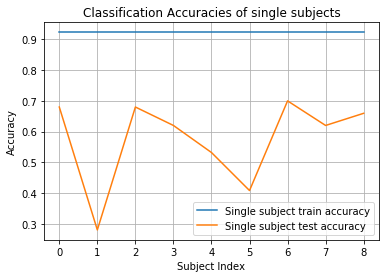

In [171]:
plt.plot(single_train_scores, label = 'Single subject train accuracy')
plt.plot(single_test_scores, label = 'Single subject test accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('Subject Index')
plt.ylabel('Accuracy')
plt.grid()
plt.title("Classification Accuracies of single subjects")
plt.show()

====================Time period is:100====================
Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 11s 5ms/sample - loss: 1.8536 - categorical_accuracy: 0.2794 - val_loss: 1.6671 - val_categorical_accuracy: 0.3115
Epoch 2/40
2115/2115 [==============================] - 4s 2ms/sample - loss: 1.5873 - categorical_accuracy: 0.3366 - val_loss: 1.5268 - val_categorical_accuracy: 0.3792
Epoch 3/40
2115/2115 [==============================] - 4s 2ms/sample - loss: 1.4835 - categorical_accuracy: 0.3910 - val_loss: 1.4672 - val_categorical_accuracy: 0.4018
Epoch 4/40
2115/2115 [==============================] - 4s 2ms/sample - loss: 1.4134 - categorical_accuracy: 0.4175 - val_loss: 1.4034 - val_categorical_accuracy: 0.4379
Epoch 5/40
2115/2115 [==============================] - 4s 2ms/sample - loss: 1.3294 - categorical_accuracy: 0.4761 - val_loss: 1.3605 - val_categorical_accuracy: 0.4447
Epoch 6/40
2115/2115 [=====================

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 17s 8ms/sample - loss: 1.9592 - categorical_accuracy: 0.2998 - val_loss: 1.8288 - val_categorical_accuracy: 0.2980
Epoch 2/40
2115/2115 [==============================] - 9s 4ms/sample - loss: 1.7116 - categorical_accuracy: 0.3414 - val_loss: 1.6285 - val_categorical_accuracy: 0.3815
Epoch 3/40
2115/2115 [==============================] - 9s 4ms/sample - loss: 1.5776 - categorical_accuracy: 0.4057 - val_loss: 1.5276 - val_categorical_accuracy: 0.4199
Epoch 4/40
2115/2115 [==============================] - 9s 4ms/sample - loss: 1.5015 - categorical_accuracy: 0.4444 - val_loss: 1.4646 - val_categorical_accuracy: 0.4582
Epoch 5/40
2115/2115 [==============================] - 9s 4ms/sample - loss: 1.4199 - categorical_accuracy: 0.4917 - val_loss: 1.4232 - val_categorical_accuracy: 0.4831
Epoch 6/40
2115/2115 [==============================] - 9s 4ms/sample - loss: 1.3413 - categorical_acc

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 24s 12ms/sample - loss: 2.0209 - categorical_accuracy: 0.2936 - val_loss: 1.5934 - val_categorical_accuracy: 0.2844
Epoch 2/40
2115/2115 [==============================] - 12s 6ms/sample - loss: 1.5052 - categorical_accuracy: 0.3480 - val_loss: 1.4707 - val_categorical_accuracy: 0.3905
Epoch 3/40
2115/2115 [==============================] - 12s 6ms/sample - loss: 1.4016 - categorical_accuracy: 0.3981 - val_loss: 1.4211 - val_categorical_accuracy: 0.3725
Epoch 4/40
2115/2115 [==============================] - 11s 5ms/sample - loss: 1.3758 - categorical_accuracy: 0.4170 - val_loss: 1.3634 - val_categorical_accuracy: 0.4176
Epoch 5/40
2115/2115 [==============================] - 11s 5ms/sample - loss: 1.3190 - categorical_accuracy: 0.4421 - val_loss: 1.3005 - val_categorical_accuracy: 0.4560
Epoch 6/40
2115/2115 [==============================] - 11s 5ms/sample - loss: 1.2656 - categoric

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 23s 11ms/sample - loss: 2.2091 - categorical_accuracy: 0.2733 - val_loss: 1.7304 - val_categorical_accuracy: 0.3183
Epoch 2/40
2115/2115 [==============================] - 16s 7ms/sample - loss: 1.5955 - categorical_accuracy: 0.3570 - val_loss: 1.5440 - val_categorical_accuracy: 0.3499
Epoch 3/40
2115/2115 [==============================] - 16s 7ms/sample - loss: 1.4461 - categorical_accuracy: 0.4038 - val_loss: 1.4151 - val_categorical_accuracy: 0.4357
Epoch 4/40
2115/2115 [==============================] - 15s 7ms/sample - loss: 1.3902 - categorical_accuracy: 0.4260 - val_loss: 1.3539 - val_categorical_accuracy: 0.4424
Epoch 5/40
2115/2115 [==============================] - 16s 7ms/sample - loss: 1.3139 - categorical_accuracy: 0.4652 - val_loss: 1.3411 - val_categorical_accuracy: 0.4718
Epoch 6/40
2115/2115 [==============================] - 16s 7ms/sample - loss: 1.2735 - categoric

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 27s 13ms/sample - loss: 2.2893 - categorical_accuracy: 0.2922 - val_loss: 1.8064 - val_categorical_accuracy: 0.3318
Epoch 2/40
2115/2115 [==============================] - 19s 9ms/sample - loss: 1.6615 - categorical_accuracy: 0.3617 - val_loss: 1.5614 - val_categorical_accuracy: 0.3725
Epoch 3/40
2115/2115 [==============================] - 19s 9ms/sample - loss: 1.5044 - categorical_accuracy: 0.3934 - val_loss: 1.4463 - val_categorical_accuracy: 0.3973
Epoch 4/40
2115/2115 [==============================] - 19s 9ms/sample - loss: 1.3978 - categorical_accuracy: 0.4421 - val_loss: 1.4057 - val_categorical_accuracy: 0.3883
Epoch 5/40
2115/2115 [==============================] - 19s 9ms/sample - loss: 1.3440 - categorical_accuracy: 0.4544 - val_loss: 1.3593 - val_categorical_accuracy: 0.4357
Epoch 6/40
2115/2115 [==============================] - 19s 9ms/sample - loss: 1.3087 - categoric

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 31s 15ms/sample - loss: 2.3486 - categorical_accuracy: 0.2567 - val_loss: 1.8176 - val_categorical_accuracy: 0.3521
Epoch 2/40
2115/2115 [==============================] - 24s 12ms/sample - loss: 1.6638 - categorical_accuracy: 0.3485 - val_loss: 1.5359 - val_categorical_accuracy: 0.3770
Epoch 3/40
2115/2115 [==============================] - 24s 12ms/sample - loss: 1.4600 - categorical_accuracy: 0.4199 - val_loss: 1.4744 - val_categorical_accuracy: 0.3815
Epoch 4/40
2115/2115 [==============================] - 25s 12ms/sample - loss: 1.3683 - categorical_accuracy: 0.4629 - val_loss: 1.3652 - val_categorical_accuracy: 0.4537
Epoch 5/40
2115/2115 [==============================] - 23s 11ms/sample - loss: 1.3009 - categorical_accuracy: 0.5059 - val_loss: 1.3498 - val_categorical_accuracy: 0.4628
Epoch 6/40
2115/2115 [==============================] - 23s 11ms/sample - loss: 1.2595 - cate

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 2.3749 - categorical_accuracy: 0.2894 - val_loss: 1.9071 - val_categorical_accuracy: 0.3183
Epoch 2/40
2115/2115 [==============================] - 27s 13ms/sample - loss: 1.7146 - categorical_accuracy: 0.3352 - val_loss: 1.6746 - val_categorical_accuracy: 0.3138
Epoch 3/40
2115/2115 [==============================] - 29s 14ms/sample - loss: 1.5048 - categorical_accuracy: 0.3948 - val_loss: 1.4741 - val_categorical_accuracy: 0.4063
Epoch 4/40
2115/2115 [==============================] - 29s 14ms/sample - loss: 1.4168 - categorical_accuracy: 0.4478 - val_loss: 1.4033 - val_categorical_accuracy: 0.4447
Epoch 5/40
2115/2115 [==============================] - 28s 13ms/sample - loss: 1.3317 - categorical_accuracy: 0.4993 - val_loss: 1.3444 - val_categorical_accuracy: 0.4560
Epoch 6/40
2115/2115 [==============================] - 28s 13ms/sample - loss: 1.2735 - cate

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 38s 18ms/sample - loss: 2.3741 - categorical_accuracy: 0.2473 - val_loss: 1.8640 - val_categorical_accuracy: 0.2596
Epoch 2/40
2115/2115 [==============================] - 31s 15ms/sample - loss: 1.6942 - categorical_accuracy: 0.2979 - val_loss: 1.5648 - val_categorical_accuracy: 0.3205
Epoch 3/40
2115/2115 [==============================] - 31s 15ms/sample - loss: 1.5005 - categorical_accuracy: 0.3712 - val_loss: 1.4657 - val_categorical_accuracy: 0.3612
Epoch 4/40
2115/2115 [==============================] - 31s 14ms/sample - loss: 1.4210 - categorical_accuracy: 0.3882 - val_loss: 1.4114 - val_categorical_accuracy: 0.3950
Epoch 5/40
2115/2115 [==============================] - 31s 15ms/sample - loss: 1.3474 - categorical_accuracy: 0.4478 - val_loss: 1.3560 - val_categorical_accuracy: 0.4244
Epoch 6/40
2115/2115 [==============================] - 31s 15ms/sample - loss: 1.2999 - cate

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 42s 20ms/sample - loss: 2.4050 - categorical_accuracy: 0.2449 - val_loss: 1.8966 - val_categorical_accuracy: 0.2506
Epoch 2/40
2115/2115 [==============================] - 35s 17ms/sample - loss: 1.7146 - categorical_accuracy: 0.2596 - val_loss: 1.5928 - val_categorical_accuracy: 0.2144
Epoch 3/40
2115/2115 [==============================] - 37s 17ms/sample - loss: 1.5449 - categorical_accuracy: 0.2539 - val_loss: 1.5016 - val_categorical_accuracy: 0.2393
Epoch 4/40
2115/2115 [==============================] - 36s 17ms/sample - loss: 1.4843 - categorical_accuracy: 0.2908 - val_loss: 1.4611 - val_categorical_accuracy: 0.2935
Epoch 5/40
2115/2115 [==============================] - 37s 18ms/sample - loss: 1.4304 - categorical_accuracy: 0.3499 - val_loss: 1.4003 - val_categorical_accuracy: 0.3296
Epoch 6/40
2115/2115 [==============================] - 36s 17ms/sample - loss: 1.3756 - cate

Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 50s 23ms/sample - loss: 2.4203 - categorical_accuracy: 0.2374 - val_loss: 1.9009 - val_categorical_accuracy: 0.2506
Epoch 2/40
2115/2115 [==============================] - 41s 19ms/sample - loss: 1.7248 - categorical_accuracy: 0.2591 - val_loss: 1.5881 - val_categorical_accuracy: 0.3318
Epoch 3/40
2115/2115 [==============================] - 40s 19ms/sample - loss: 1.5294 - categorical_accuracy: 0.3220 - val_loss: 1.5789 - val_categorical_accuracy: 0.2573
Epoch 4/40
2115/2115 [==============================] - 41s 19ms/sample - loss: 1.4590 - categorical_accuracy: 0.3645 - val_loss: 1.4282 - val_categorical_accuracy: 0.3905
Epoch 5/40
2115/2115 [==============================] - 41s 20ms/sample - loss: 1.3891 - categorical_accuracy: 0.4071 - val_loss: 1.4105 - val_categorical_accuracy: 0.3612
Epoch 6/40
2115/2115 [==============================] - 41s 19ms/sample - loss: 1.3393 - cate

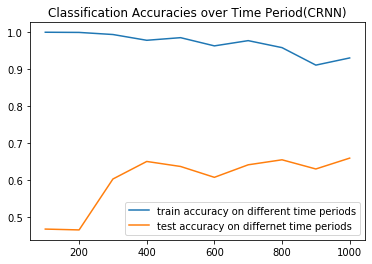

In [196]:
train_scores_LSTM = []
test_scores_LSTM = []

for time in range(100, 1001, 100):
    print("=" *20 + "Time period is:" + str(time) + "="*20)
    train_score, test_score = train_data(time_period = time)
    train_scores_LSTM.append(train_score[1])
    test_scores_LSTM.append(test_score[1])
    
print("Train accuracies on different time sections: " +str(train_scores_LSTM))
print("Test accuracies on different time sections: " +str(test_scores_LSTM))

max_idx = np.argmax(test_scores_LSTM)
print("The highest accuracy is: %f, and the time period is %d." %(max(test_scores_LSTM), (100+50*max_idx)))

plt.plot(range(100,1001,100), train_scores_LSTM, label = 'train accuracy on different time periods')
plt.plot(range(100,1001,100), test_scores_LSTM, label = 'test accuracy on differnet time periods')
plt.legend()
plt.title("Classification Accuracies over Time Period(CRNN)")
plt.show()

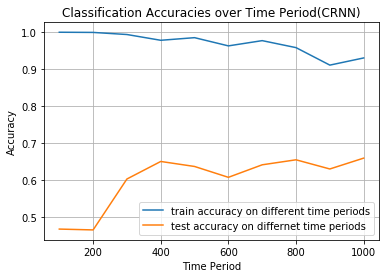

Train accuracies on different time sections: [0.9995272, 0.9990544, 0.9933806, 0.9777778, 0.98486996, 0.96264774, 0.97683215, 0.9579196, 0.9106383, 0.93002367]
Test accuracies on different time sections: [0.46726862, 0.4650113, 0.6027088, 0.65011287, 0.63656884, 0.60722345, 0.64108354, 0.65462756, 0.62979686, 0.6591422]
The highest accuracy is: 0.659142, and the time period is 1000.


In [211]:
plt.plot(range(100,1001,100), train_scores_LSTM, label = 'train accuracy on different time periods')
plt.plot(range(100,1001,100), test_scores_LSTM, label = 'test accuracy on differnet time periods')
plt.legend()
plt.xlabel('Time Period')
plt.ylabel('Accuracy')
plt.grid()
plt.title("Classification Accuracies over Time Period(CRNN)")
plt.show()

print("Train accuracies on different time sections: " +str(train_scores_LSTM))
print("Test accuracies on different time sections: " +str(test_scores_LSTM))

max_idx = np.argmax(test_scores_LSTM)
print("The highest accuracy is: %f, and the time period is %d." %(max(test_scores_LSTM), (100+100*max_idx)))
